# Exploration of results

Exploration of the result of executing several node metrics, to the nodes of the three matrices (FA, GM and RS) separately, applying different threshold in the weights of the edges of the nodes, applying different criteria of pvalue.

Applied metrics: node strength, degree centrality, closeness centrality, betweenness centrality, clustering and square clustering (pagerank deleted).

pValues used: 0.05, 0.01, 0.001

Threshold range: from 0 to 0.95 making steps of 0.05.

What we are showing is how many t-tests each configuration has exceeded.

In each result table for each configuration, the columns are displayed: Single, Partial, All.

Single is the total number of t-tests that have been passed with the configuration.

Partial is the number of metrics applied to a node where more than one group of pairs has passed the t-test.

All is the number of metrics applied to a node where all pairs in the group have passed the t-test.

The column index is the threshold applied


In [1]:
import pickle
import numpy as np
import pandas as pd
import copy

# Results FA

In [2]:
with open("resultatsFA.pkl", "rb") as fp:   # Unpickling
    FA = pickle.load(fp)


## pValor = 0.05

In [3]:
ind=[str(i/20) for i in range(0,20)]    
FA1 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=FA1.index.values
for i in range(0,20):
    df = pd.DataFrame(FA[0][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    try:
        FA1.loc[ind2[i]] = pd.Series({'Single':len(FA[0][i+1][0]), 'Partial':len(FA[0][i+1][2]), 'All':len(FA[0][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    except:
        FA1.loc[ind2[i]] = pd.Series({'Single':0, 'Partial':0, 'All':0,  'Top Nodes 1': '--','Top Nodes 2': '--','Top Nodes 3': '--','Top Metric':'--'})
FA1


,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,34647,10386,0,right.caudate,ctx.rh.middletemporal,ctx.lh.inferiorparietal,closeness_centrality
0.05,34647,10386,0,right.caudate,ctx.rh.middletemporal,ctx.lh.inferiorparietal,closeness_centrality
0.1,34647,10386,0,right.caudate,ctx.rh.middletemporal,ctx.lh.inferiorparietal,closeness_centrality
0.15,50029,14859,0,right.caudate,ctx.rh.middletemporal,ctx.lh.precuneus,square_clustering
0.2,58932,17122,0,right.caudate,ctx.lh.precuneus,ctx.rh.middletemporal,square_clustering
0.25,53120,15272,0,right.caudate,ctx.lh.inferiorparietal,ctx.lh.superiortemporal,square_clustering
0.3,40012,11506,2,ctx.lh.inferiorparietal,right.caudate,ctx.rh.precuneus,closeness_centrality
0.35,19454,4512,0,ctx.rh.lingual,ctx.rh.cuneus,left.hippocampus,degree_centrality
0.4,13854,2332,0,ctx.rh.lingual,ctx.rh.parahippocampal,ctx.rh.transversetemporal,betweenness_centrality
0.45,20912,4409,0,ctx.lh.entorhinal,left.accumbens,ctx.lh.insula,clustering


<AxesSubplot:>

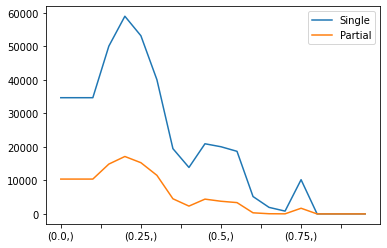

In [4]:
FA1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [5]:
FA2 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=FA2.index.values
for i in range(0,20):

    df = pd.DataFrame(FA[1][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    try:
        FA2.loc[ind2[i]] = pd.Series({'Single':len(FA[1][i+1][0]), 'Partial':len(FA[1][i+1][2]), 'All':len(FA[1][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    except:
        FA2.loc[ind2[i]] = pd.Series({'Single':0, 'Partial':0, 'All':0,  'Top Nodes 1': '--','Top Nodes 2': '--','Top Nodes 3': '--','Top Metric':'--'})

FA2

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,12511,3114,0,right.caudate,ctx.lh.superiortemporal,left.hippocampus,closeness_centrality
0.05,12511,3114,0,right.caudate,ctx.lh.superiortemporal,left.hippocampus,closeness_centrality
0.1,12511,3114,0,right.caudate,ctx.lh.superiortemporal,left.hippocampus,closeness_centrality
0.15,19714,5570,0,ctx.lh.superiortemporal,right.caudate,ctx.lh.superiorparietal,square_clustering
0.2,26014,7560,0,right.caudate,ctx.lh.superiortemporal,ctx.lh.precuneus,square_clustering
0.25,22408,6641,0,right.caudate,ctx.lh.precuneus,ctx.rh.pericalcarine,square_clustering
0.3,12848,3377,0,right.caudate,left.hippocampus,ctx.lh.precuneus,closeness_centrality
0.35,3914,509,0,ctx.rh.lingual,ctx.rh.pericalcarine,ctx.rh.cuneus,betweenness_centrality
0.4,3969,330,0,ctx.rh.lingual,ctx.lh.middletemporal,ctx.rh.pericalcarine,betweenness_centrality
0.45,7140,1267,0,ctx.rh.middletemporal,ctx.lh.fusiform,ctx.lh.insula,clustering


<AxesSubplot:>

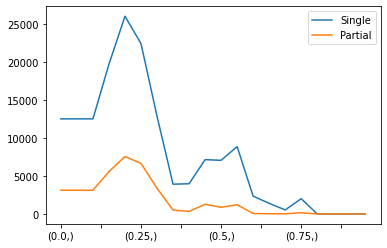

In [6]:
FA2.plot(y=['Single', 'Partial'])

## pValor = 0.001

In [7]:
FA3 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=FA3.index.values
for i in range(0,20):
    df = pd.DataFrame(FA[2][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    try:
        FA3.loc[ind2[i]] = pd.Series({'Single':len(FA[2][i+1][0]), 'Partial':len(FA[2][i+1][2]), 'All':len(FA[2][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    except:
        FA3.loc[ind2[i]] = pd.Series({'Single':0, 'Partial':0, 'All':0,  'Top Nodes 1': '--','Top Nodes 2': '--','Top Nodes 3': '--','Top Metric':'--'})

FA3

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,2981,536,0,right.caudate,ctx.rh.pericalcarine,ctx.lh.superiorparietal,closeness_centrality
0.05,2981,536,0,right.caudate,ctx.rh.pericalcarine,ctx.lh.superiorparietal,closeness_centrality
0.1,2981,536,0,right.caudate,ctx.rh.pericalcarine,ctx.lh.superiorparietal,closeness_centrality
0.15,5593,1070,0,right.caudate,ctx.rh.precuneus,ctx.lh.superiorparietal,square_clustering
0.2,7513,1314,0,right.caudate,ctx.rh.precuneus,ctx.rh.pericalcarine,square_clustering
0.25,4995,732,0,ctx.rh.precuneus,right.caudate,ctx.rh.pericalcarine,square_clustering
0.3,1776,62,0,ctx.rh.cuneus,ctx.rh.lateraloccipital,right.putamen,closeness_centrality
0.35,570,8,0,left.amygdala,ctx.rh.cuneus,ctx.rh.lingual,betweenness_centrality
0.4,899,10,0,ctx.rh.lingual,left.putamen,ctx.lh.superiorparietal,square_clustering
0.45,2019,195,0,ctx.lh.insula,ctx.lh.lingual,ctx.lh.fusiform,clustering


<AxesSubplot:>

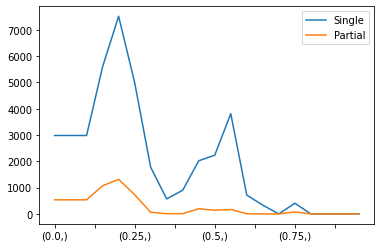

In [8]:
FA3.plot(y=['Single', 'Partial'])

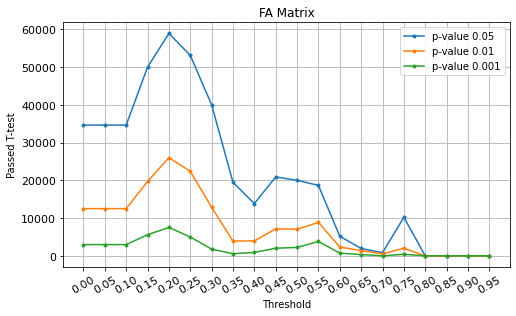

In [9]:
x=[i/20 for i in range(0,20)]
FATot=pd.DataFrame()
FATot['p-value 0.05']=FA1['Single']
FATot['p-value 0.01']=FA2['Single']
FATot['p-value 0.001']=FA3['Single']
FATot['index']=x
FATot=FATot.set_index('index')
FATot.plot(y=['p-value 0.05','p-value 0.01','p-value 0.001'], xticks=x, xlabel='Threshold',ylabel='Passed T-test', figsize=(8,4.5), title='FA Matrix', rot=30,fontsize=11,style='.-', grid=True).get_figure().savefig('FA_thr_comparation.png')

# Results GM

In [10]:
with open("resultatsGM.pkl", "rb") as fp:   # Unpickling
    GM = pickle.load(fp)


## pValor = 0.05

In [11]:
ind=[str(i/20) for i in range(0,20)]    
GM1 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM1.index.values
for i in range(0,20):
    df = pd.DataFrame(GM[0][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("square_clustering")==False]
    df =df[df["Metric"].str.contains("pagerank")==False]
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)

    GM1.loc[ind2[i]] = pd.Series({'Single':len(GM[0][i+1][0]), 'Partial':len(GM[0][i+1][2]), 'All':len(GM[0][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
GM1


,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,34482,10329,0,ctx.lh.inferiortemporal,right.pallidum,right.amygdala,clustering
0.05,26587,6754,0,right.pallidum,ctx.lh.superiortemporal,ctx.rh.medialorbitofrontal,closeness_centrality
0.1,27528,7053,0,ctx.lh.insula,ctx.rh.parsopercularis,right.pallidum,betweenness_centrality
0.15,24998,5762,0,ctx.rh.parsopercularis,ctx.lh.insula,ctx.rh.lateralorbitofrontal,degree_centrality
0.2,21289,4695,0,ctx.rh.cuneus,ctx.lh.entorhinal,ctx.rh.lateralorbitofrontal,degree_centrality
0.25,21446,4787,0,ctx.lh.entorhinal,ctx.rh.lateralorbitofrontal,ctx.rh.transversetemporal,closeness_centrality
0.3,22441,5325,0,ctx.rh.parsopercularis,ctx.lh.entorhinal,ctx.rh.lateralorbitofrontal,closeness_centrality
0.35,22723,5253,0,ctx.lh.entorhinal,ctx.rh.lateralorbitofrontal,ctx.rh.parstriangularis,closeness_centrality
0.4,22742,5221,0,ctx.lh.entorhinal,ctx.rh.parsopercularis,ctx.rh.lateralorbitofrontal,closeness_centrality
0.45,22917,5229,0,ctx.lh.entorhinal,ctx.rh.lateralorbitofrontal,ctx.rh.parsopercularis,degree_centrality


<AxesSubplot:>

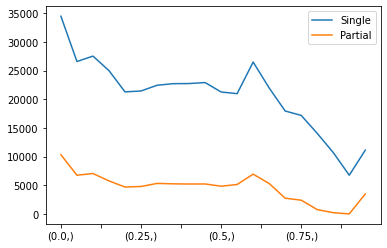

In [12]:
GM1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [13]:
ind=[str(i/20) for i in range(0,20)]    
GM2 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM2.index.values
for i in range(0,20):
    df = pd.DataFrame(GM[1][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)

    GM2.loc[ind2[i]] = pd.Series({'Single':len(GM[1][i+1][0]), 'Partial':len(GM[1][i+1][2]), 'All':len(GM[1][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
GM2

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,10947,2008,0,ctx.rh.pericalcarine,right.pallidum,ctx.rh.inferiortemporal,betweenness_centrality
0.05,6191,1061,0,ctx.rh.medialorbitofrontal,left.thalamus,ctx.lh.rostralmiddlefrontal,betweenness_centrality
0.1,7962,1078,0,ctx.rh.medialorbitofrontal,ctx.rh.caudalanteriorcingulate,ctx.rh.lateralorbitofrontal,square_clustering
0.15,7313,840,0,ctx.rh.lateralorbitofrontal,ctx.rh.cuneus,ctx.rh.inferiorparietal,square_clustering
0.2,6496,831,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.cuneus,degree_centrality
0.25,6745,1010,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.parsopercularis,closeness_centrality
0.3,7230,908,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.parsopercularis,degree_centrality
0.35,7284,885,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.parsopercularis,degree_centrality
0.4,7407,918,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.parsopercularis,closeness_centrality
0.45,7236,838,0,ctx.rh.medialorbitofrontal,ctx.rh.lateralorbitofrontal,ctx.rh.parsopercularis,closeness_centrality


<AxesSubplot:>

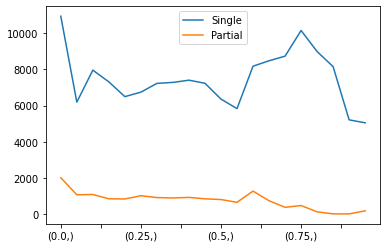

In [14]:
GM2.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [15]:
ind=[str(i/20) for i in range(0,20)]    
GM3 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM3.index.values
for i in range(0,20):
    df = pd.DataFrame(GM[2][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    try:
        GM3.loc[ind2[i]] = pd.Series({'Single':len(GM[2][i+1][0]), 'Partial':len(GM[2][i+1][2]), 'All':len(GM[2][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    except:
        GM3.loc[ind2[i]] = pd.Series({'Single':0, 'Partial':0, 'All':0,  'Top Nodes 1': '--','Top Nodes 2': '--','Top Nodes 3': '--','Top Metric':'--'})

GM3


,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,2297,144,0,ctx.rh.pericalcarine,right.pallidum,left.thalamus,betweenness_centrality
0.05,893,23,0,ctx.rh.medialorbitofrontal,ctx.rh.pericalcarine,right.thalamus,closeness_centrality
0.1,1227,54,0,ctx.lh.cuneus,right.thalamus,ctx.rh.caudalanteriorcingulate,square_clustering
0.15,1530,44,0,ctx.rh.lateralorbitofrontal,ctx.lh.cuneus,right.thalamus,betweenness_centrality
0.2,1616,56,0,ctx.rh.inferiorparietal,ctx.rh.lateralorbitofrontal,ctx.rh.caudalanteriorcingulate,betweenness_centrality
0.25,1387,113,0,ctx.rh.lateralorbitofrontal,ctx.rh.caudalanteriorcingulate,right.thalamus,betweenness_centrality
0.3,1611,127,0,ctx.rh.lateralorbitofrontal,ctx.rh.caudalanteriorcingulate,ctx.lh.posteriorcingulate,betweenness_centrality
0.35,1855,126,0,ctx.rh.lateralorbitofrontal,ctx.rh.caudalanteriorcingulate,ctx.rh.medialorbitofrontal,betweenness_centrality
0.4,1922,127,0,ctx.rh.lateralorbitofrontal,ctx.rh.caudalanteriorcingulate,ctx.rh.medialorbitofrontal,betweenness_centrality
0.45,1855,132,0,ctx.rh.lateralorbitofrontal,ctx.rh.medialorbitofrontal,ctx.rh.caudalanteriorcingulate,betweenness_centrality


<AxesSubplot:>

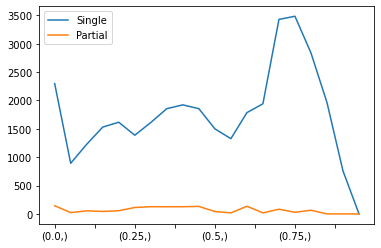

In [16]:
GM3.plot(y=['Single', 'Partial'])

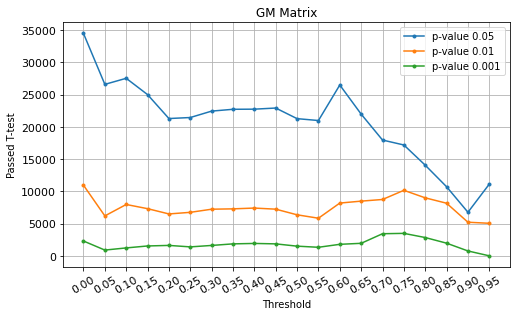

In [17]:
x=[i/20 for i in range(0,20)]
GMTot=pd.DataFrame()
GMTot['p-value 0.05']=GM1['Single']
GMTot['p-value 0.01']=GM2['Single']
GMTot['p-value 0.001']=GM3['Single']
GMTot['index']=x
GMTot=GMTot.set_index('index')
GMTot.plot(y=['p-value 0.05','p-value 0.01','p-value 0.001'], xticks=x, xlabel='Threshold',ylabel='Passed T-test', figsize=(8,4.5), title='GM Matrix', rot=30,fontsize=11,style='.-', grid=True).get_figure().savefig('GM_thr_comparation.png')

# Results RS

In [18]:
with open("resultatsRS.pkl", "rb") as fp:   # Unpickling
    RS = pickle.load(fp)


## pValor = 0.05

In [19]:
ind=[str(i/20) for i in range(0,20)]    
RS1 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM1.index.values
for i in range(0,20):
    df = pd.DataFrame(RS[0][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]

    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    RS1.loc[ind2[i]] = pd.Series({'Single':len(RS[0][i+1][0]), 'Partial':len(RS[0][i+1][2]), 'All':len(RS[0][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    
RS1

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,2371,373,0,right.putamen,ctx.lh.parahippocampal,ctx.rh.entorhinal,node_strength
0.05,29558,8428,0,ctx.rh.precentral,ctx.rh.postcentral,ctx.lh.insula,square_clustering
0.1,25126,7102,0,ctx.lh.medialorbitofrontal,ctx.rh.postcentral,ctx.rh.lateralorbitofrontal,square_clustering
0.15,21292,5440,0,ctx.lh.parahippocampal,right.accumbens,ctx.lh.parsopercularis,square_clustering
0.2,23307,5622,0,ctx.lh.parahippocampal,right.accumbens,ctx.lh.superiortemporal,square_clustering
0.25,22377,5474,0,ctx.lh.parahippocampal,right.accumbens,ctx.rh.lateralorbitofrontal,clustering
0.3,22387,5757,0,ctx.lh.parahippocampal,ctx.lh.parsorbitalis,ctx.lh.middletemporal,clustering
0.35,25866,6928,0,ctx.rh.lateralorbitofrontal,ctx.lh.middletemporal,ctx.lh.parsorbitalis,clustering
0.4,27630,7144,0,ctx.lh.parsorbitalis,ctx.lh.rostralmiddlefrontal,ctx.rh.postcentral,clustering
0.45,26610,6918,0,ctx.lh.parsorbitalis,ctx.lh.postcentral,ctx.rh.caudalanteriorcingulate,closeness_centrality


<AxesSubplot:>

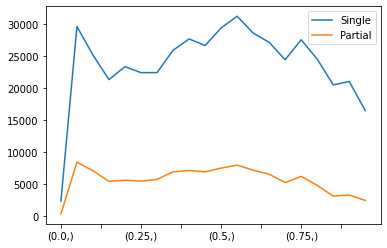

In [20]:
RS1.plot(y=['Single', 'Partial'])

## pValor = 0.01

In [21]:
ind=[str(i/20) for i in range(0,20)]    
RS2 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM1.index.values
for i in range(0,20):
    df = pd.DataFrame(RS[1][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    RS2.loc[ind2[i]] = pd.Series({'Single':len(RS[1][i+1][0]), 'Partial':len(RS[1][i+1][2]), 'All':len(RS[1][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})

RS2

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,352,10,0,ctx.lh.parahippocampal,ctx.rh.postcentral,ctx.lh.medialorbitofrontal,node_strength
0.05,4100,244,0,ctx.lh.medialorbitofrontal,right.thalamus,ctx.lh.parahippocampal,betweenness_centrality
0.1,3035,363,0,ctx.lh.parahippocampal,ctx.lh.medialorbitofrontal,left.thalamus,betweenness_centrality
0.15,3450,428,0,ctx.lh.parahippocampal,ctx.lh.medialorbitofrontal,ctx.rh.insula,square_clustering
0.2,3554,508,0,ctx.lh.parahippocampal,ctx.lh.medialorbitofrontal,left.accumbens,closeness_centrality
0.25,3908,569,0,ctx.lh.parahippocampal,ctx.lh.medialorbitofrontal,right.accumbens,closeness_centrality
0.3,3466,378,0,ctx.lh.parahippocampal,ctx.rh.insula,left.accumbens,closeness_centrality
0.35,5445,734,0,left.accumbens,ctx.lh.pericalcarine,ctx.lh.parahippocampal,clustering
0.4,5357,314,0,ctx.lh.parahippocampal,ctx.lh.parsorbitalis,left.accumbens,degree_centrality
0.45,6717,801,0,ctx.lh.postcentral,ctx.lh.parsorbitalis,left.accumbens,degree_centrality


<AxesSubplot:>

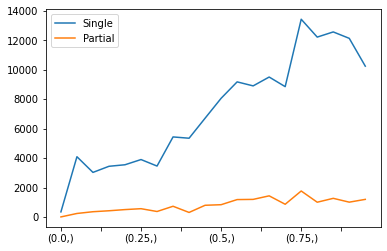

In [22]:
RS2.plot(y=['Single', 'Partial'])

## pValor = 0.001

In [23]:
ind=[str(i/20) for i in range(0,20)]    
RS3 = pd.DataFrame(columns=['Single','Partial','All', 'Top Nodes 1', 'Top Nodes 2', 'Top Nodes 3', 'Top Metric'], index=[ind])
ind2=GM1.index.values
for i in range(0,20):
    df = pd.DataFrame(RS[2][i+1][0], columns=['Matrix','Node','Metric','nPv','Result'])
    df =df[df["Metric"].str.contains("pagerank")==False]
    df2 = df.drop(columns=['Matrix','Node','nPv']).groupby(['Metric']).count().sort_values(by='Result', ascending=False).head(1)
    df = df.drop(columns=['Matrix','Metric','nPv']).groupby(['Node']).count().sort_values(by='Result', ascending=False).head(3)
    try:
        RS3.loc[ind2[i]] = pd.Series({'Single':len(RS[2][i+1][0]), 'Partial':len(RS[2][i+1][2]), 'All':len(RS[2][i+1][1]),  'Top Nodes 1': copy.deepcopy(df.index.values[0]),'Top Nodes 2': copy.deepcopy(df.index.values[1]),'Top Nodes 3': copy.deepcopy(df.index.values[2]),'Top Metric':copy.deepcopy(df2.index.values[0])})
    except:
        RS3.loc[ind2[i]] = pd.Series({'Single':0, 'Partial':0, 'All':0,  'Top Nodes 1': '--','Top Nodes 2': '--','Top Nodes 3': '--','Top Metric':'--'})

RS3

,Single,Partial,All,Top Nodes 1,Top Nodes 2,Top Nodes 3,Top Metric
0.0,0,0,0,--,--,--,--
0.05,175,0,0,ctx.rh.insula,ctx.rh.middletemporal,left.thalamus,closeness_centrality
0.1,356,43,0,ctx.lh.medialorbitofrontal,ctx.rh.insula,ctx.lh.parahippocampal,degree_centrality
0.15,382,9,0,ctx.lh.medialorbitofrontal,ctx.lh.parahippocampal,ctx.rh.insula,closeness_centrality
0.2,388,7,0,ctx.lh.parahippocampal,ctx.lh.medialorbitofrontal,ctx.lh.lateralorbitofrontal,degree_centrality
0.25,490,0,0,left.accumbens,ctx.lh.parahippocampal,ctx.lh.superiortemporal,clustering
0.3,487,0,0,ctx.lh.parahippocampal,left.accumbens,ctx.rh.middletemporal,degree_centrality
0.35,837,53,0,left.accumbens,ctx.lh.pericalcarine,ctx.lh.parstriangularis,clustering
0.4,736,13,0,ctx.lh.parahippocampal,left.accumbens,ctx.lh.parsorbitalis,degree_centrality
0.45,858,73,0,ctx.rh.middletemporal,left.accumbens,ctx.lh.postcentral,betweenness_centrality


<AxesSubplot:>

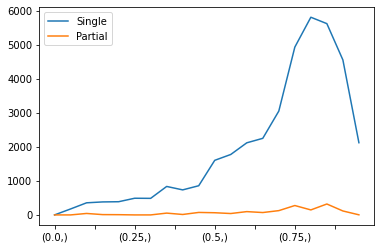

In [24]:
RS3.plot(y=['Single', 'Partial'])

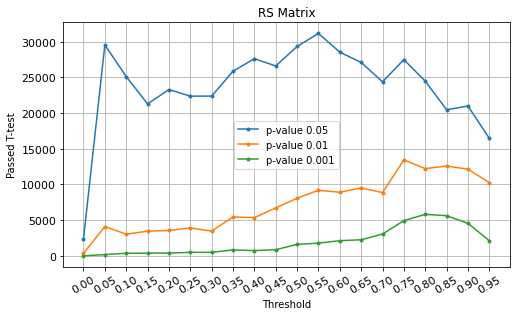

In [25]:
x=[i/20 for i in range(0,20)]
RSTot=pd.DataFrame()
RSTot['p-value 0.05']=RS1['Single']
RSTot['p-value 0.01']=RS2['Single']
RSTot['p-value 0.001']=RS3['Single']
RSTot['index']=x
RSTot=RSTot.set_index('index')
RSTot.plot(y=['p-value 0.05','p-value 0.01','p-value 0.001'], xticks=x, xlabel='Threshold',ylabel='Passed T-test', figsize=(8,4.5), title='RS Matrix', rot=30,fontsize=11,style='.-', grid=True).get_figure().savefig('RS_thr_comparation.png')